In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('artifact/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
# Check for Data Preprocessing 

data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
# Text Preprocessing

import re
import string

In [8]:
# First 5 raws of dataset

data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [9]:
# Convert Uppercase to Lowercase

data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))


In [10]:
# Comfirmation of Lowercase to Uppercase

data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [11]:
# Remove links

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x, flags = re.MULTILINE) for x in x.split()))

In [12]:
# Comfirmation of Removing Links

data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
# Remove Punctuation marks

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [14]:
# Comfirmation of Removing Punctuation Marks

data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [15]:
# Check for Numbers in the dataset

data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [16]:
# Remove Numbers

data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex = True)

In [17]:
# Comfirmation of Removing Numbers

data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [18]:
!pip install nltk

In [19]:
# Download nltk to Remove Stopwords

import nltk 

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Get English stopwords from the download location

with open('C:/Users/USER/PycharmProjects/TextSentiment/static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
# All Stopwords in English Language

sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# Remove Stopwords

data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
# Confirmation of Remove Stopwords

data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [25]:
# Import Libraries for Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
# Stemming

data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
# Confirmation of Stemming

data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Bulding Vocabulary


In [28]:
from collections import Counter
vocab = Counter()

In [29]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [30]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [31]:
len(vocab)

15949

In [32]:
data.shape

(7920, 3)

In [33]:
tokens = [key for key in vocab if vocab[key] > 10]

In [34]:
len(tokens)

1145

In [35]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = 'utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, 'C:/Users/USER/PycharmProjects/TextSentiment/static/model/vocabulary.txt')

# Divide dataset

In [36]:
x = data['tweet']
y = data['label']

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [39]:
x_train.shape

(6336,)

In [40]:
x_test.shape

(1584,)

In [41]:
x_train

7839    bamboo vocat newyear trip thailand khaoko ilc ...
5142    time useless meet kiss smile selfi iphon inlov...
3089    gain follow rt must follow follow back follow ...
2454    best friend best friend cilacap miss samsung b...
2472    johnni depp’ lawyer alleg amber… news photogra...
                              ...                        
1739    iphon usb cabl … iphonec iphon nationalpetday ...
4246    duinebeag god that good need day plan im backm...
4179    app store cave islamofascist fail fail fail ap...
2611              ericcanona skm haha thought hahahahahah
1093    deliveri text new phone excit much newtoy sams...
Name: tweet, Length: 6336, dtype: object

In [42]:
x_test

1092                 first app releas app store iphon app
6752                 depress moment green candi appl lime
5701    oliv samsung live laugh life legoland malaysia...
5026    thing love nike nikefc harleydavidson iphon ip...
5212      iphon slow almost unus anybodi new window phone
                              ...                        
5990    dont make time peopl dont make time sad samsun...
5253                               im go instal soni vega
1630    iphon start fall apart earlier still thrill us...
6601    eboni coffe tabl final coat ridgid ryobi trout...
1251    would like wish amaz day make everi minut coun...
Name: tweet, Length: 1584, dtype: object

### Vectorization

In [43]:
# Convert to numerical value (y set is always in numerical value)


def vectorize(ds, vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_list =  np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
                
        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype = np.float32)
    
    return vectorized_list_new

In [44]:
vectorized_x_train = vectorize(x_train, tokens)

In [45]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
vectorized_x_train.shape

(6336, 1145)

In [47]:
y_train

7839    0
5142    0
3089    0
2454    0
2472    0
       ..
1739    0
4246    0
4179    1
2611    1
1093    0
Name: label, Length: 6336, dtype: int64

In [48]:
vectorized_x_test = vectorize(x_test, tokens)

In [49]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
y_test

1092    0
6752    1
5701    0
5026    0
5212    1
       ..
5990    1
5253    0
1630    0
6601    0
1251    0
Name: label, Length: 1584, dtype: int64

In [51]:
y_train.value_counts()

label
0    4713
1    1623
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

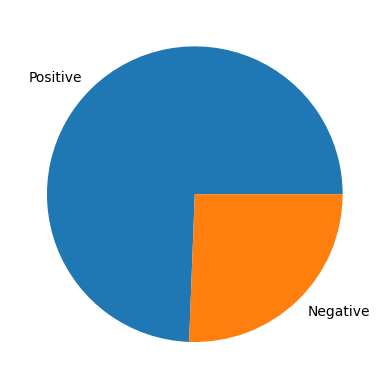

In [52]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show

### Handle Inbalanced Dataset

In [53]:
!pip install imbalanced-learn

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)
 

C:\Users\USER\PycharmProjects\TextSentiment\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\USER\PycharmProjects\TextSentiment\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1538, in

(9426, 1145) (9426,)


In [55]:
y_train_smote.value_counts()

label
0    4713
1    4713
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

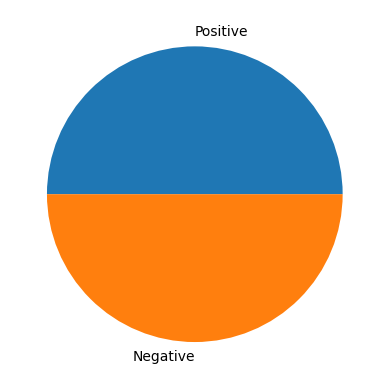

In [56]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show

In [57]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9421    1
9422    1
9423    1
9424    1
9425    1
Name: label, Length: 9426, dtype: int64

In [59]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y_test

1092    0
6752    1
5701    0
5026    0
5212    1
       ..
5990    1
5253    0
1630    0
6601    0
1251    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecisin = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecisin = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [63]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precisin = 0.918
	Recall = 0.967
	F1-Score = 0.942
Training Scores:
	Accuracy = 0.858
	Precisin = 0.693
	Recall = 0.794
	F1-Score = 0.74


### Naive Bayes

In [64]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precisin = 0.873
	Recall = 0.955
	F1-Score = 0.912
Training Scores:
	Accuracy = 0.86
	Precisin = 0.662
	Recall = 0.921
	F1-Score = 0.771


### Decision Tree

In [65]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precisin = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training Scores:
	Accuracy = 0.836
	Precisin = 0.673
	Recall = 0.69
	F1-Score = 0.681


### Random Forest

In [66]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precisin = 0.999
	Recall = 1.0
	F1-Score = 1.0
Training Scores:
	Accuracy = 0.849
	Precisin = 0.715
	Recall = 0.677
	F1-Score = 0.696


### Support Vector Machine

In [67]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precisin = 0.962
	Recall = 0.996
	F1-Score = 0.978
Training Scores:
	Accuracy = 0.866
	Precisin = 0.72
	Recall = 0.777
	F1-Score = 0.747


### Saving model using pickle

In [69]:
import pickle

with open('static/model/mlModel.pickle','wb') as file:
    pickle.dump(lr, file)